In [533]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [534]:
cases = pd.read_csv('./ecdc/new_cases_per_million.csv')
tests = pd.read_csv('./testing/covid-testing-all-observations.csv')

In [535]:
inds = np.array(tests['Entity'].str.find('-'))
countstr = tests['Entity'].tolist()
countries = [countstr[i][:inds[i]-1] for i in range(len(inds))]
tests['Country']=countries
countries_unique = tests['Country'].unique()
erase = ['Iceland','Turkey','Tunisia','Australia','Austria','Bahrain','Ireland','Indonesia','Estonia','South Africa','United States','Uruguay','Vietnam']
list2 = []
for i in range(len(countries_unique)):
    if countries_unique[i] not in erase:
        list2.append(countries_unique[i])
countries_unique = np.array(list2)

In [536]:
dates = cases['date'].unique()
values = np.nan*np.zeros((len(dates),2, len(countries_unique)))
days = np.nan*np.zeros((len(dates),2, len(countries_unique)))
for d in range(len(dates)):
    date = dates[d]
    days[d,:,:] = d
    cases_day = cases[cases['date']==date][countries_unique]
    tests_day = tests[tests['Date']==date]['Daily change in cumulative total per thousand'].tolist()
    tests_day_country = tests[tests['Date']==date]['Country'].tolist()
    #print(tests_day_country)

    for i in range(len(tests_day_country)):
        
        count = np.where(countries_unique==tests_day_country[i])[0]
        #print(count)
        if(len(count)>0):
            values[d,0,count[0]] = tests_day[i]
    for i in range(len(countries_unique)):
        values[d,1,i] = cases_day[countries_unique[i]]/1000

/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


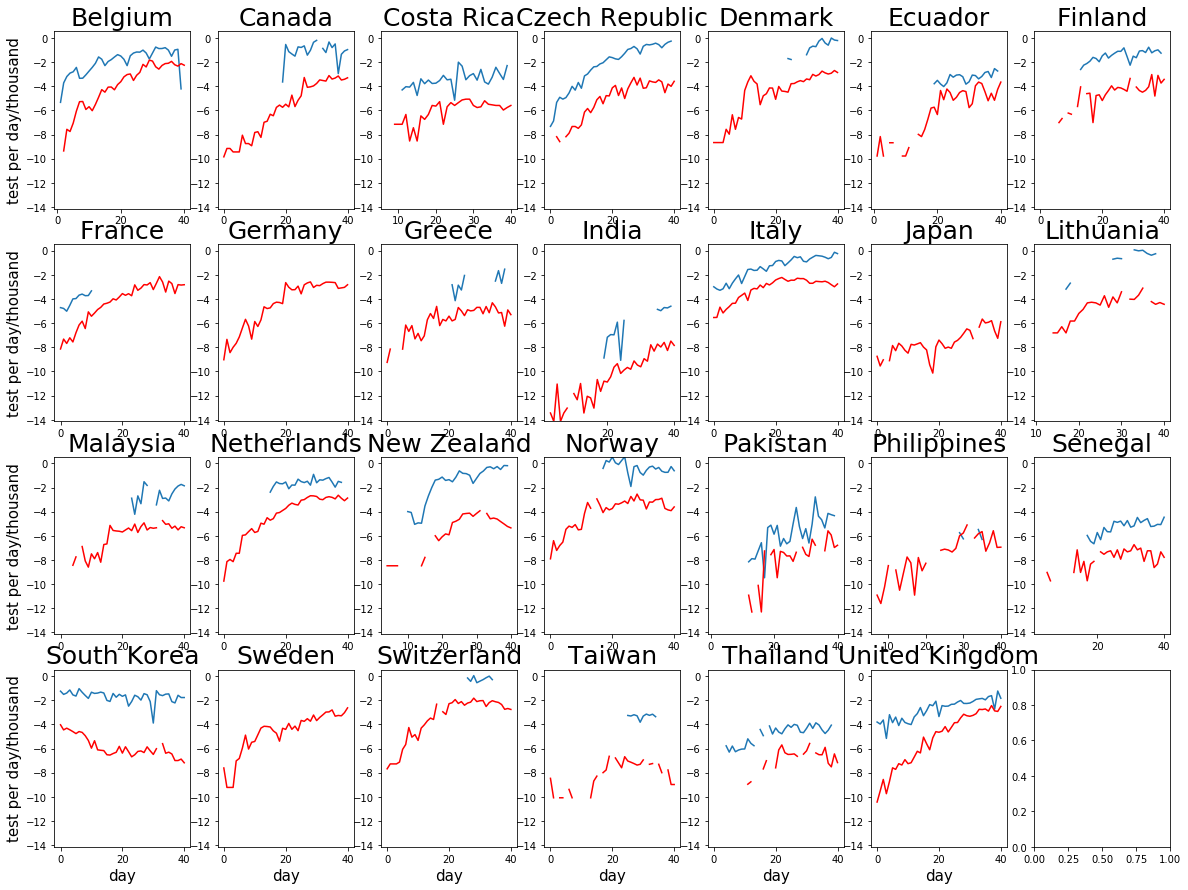

In [539]:
fig,ax = plt.subplots(4,7,figsize=(20,15))
ax=ax.flatten()
ini=60
maxy = np.nanmax(np.log(values[ini:,0,:]))
ll=np.log(values[ini:,1,:])[:]
ll=ll[ll>-np.inf]
miny = np.nanmin(ll)

for i in range(len(countries_unique)):
    ax[i].plot(np.log(values[ini:,0,i]))
    ax[i].plot(np.log(values[ini:,1,i]),'red')
    ax[i].set_title(countries_unique[i],fontsize=25)
    ax[i].set_ylim([miny,maxy])
    if i>=21:
        ax[i].set_xlabel('day',fontsize=15)
    if i%7 ==0:
        ax[i].set_ylabel('test per day/thousand',fontsize=15)

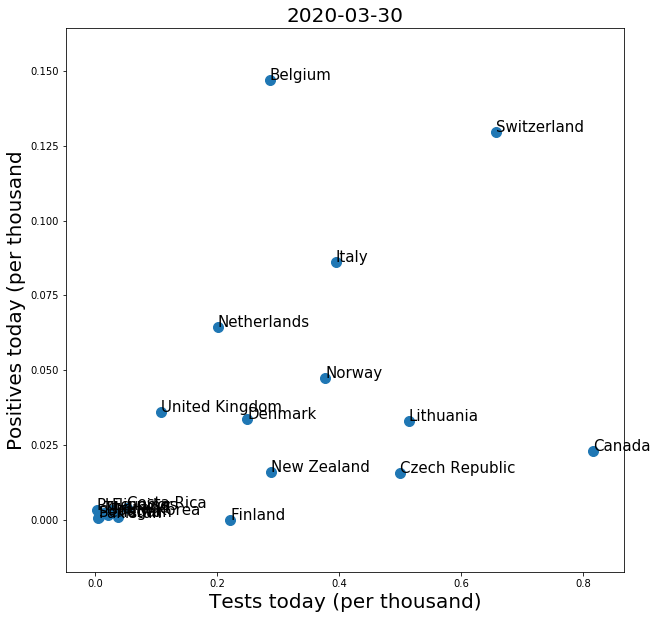

In [541]:
d = 90
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(values[d,0,:], values[d,1,:],100)
ax.set_title(dates[d],fontsize=20)
ax.set_xlabel('Tests today (per thousand)',fontsize=20)
ax.set_ylabel('Positives today (per thousand',fontsize=20)
for i, txt in enumerate(countries_unique):
    ax.annotate(txt[:], (values[d,0,i], values[d,1,i]),size=15)

/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


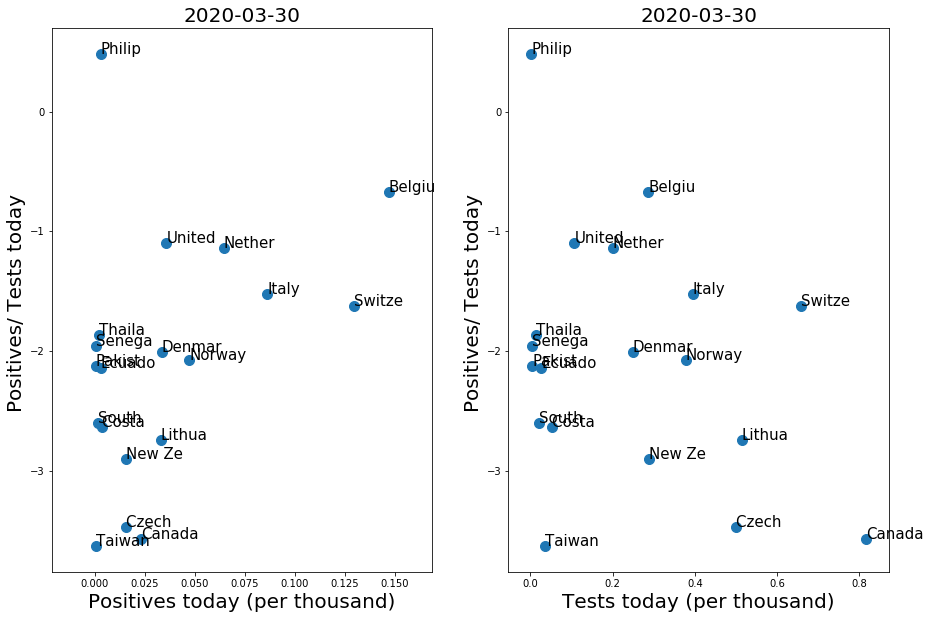

In [542]:

fig,ax = plt.subplots(1,2,figsize=(15,10))
#ax.set_yscale('log')
#ax[0].set_xscale('log')
ax[0].scatter(values[d,1,:], np.log(values[d,1,:]/values[d,0,:]),100)

ax[0].set_title(dates[d],fontsize=20)
ax[0].set_xlabel('Positives today (per thousand)',fontsize=20)
ax[0].set_ylabel('Positives/ Tests today ',fontsize=20)

for i, txt in enumerate(countries_unique):
    ax[0].annotate(txt[:6], (values[d,1,i], np.log(values[d,1,i]/values[d,0,i])),size=15)

#ax[1].set_xscale('log')
ax[1].scatter(values[d,0,:], np.log(values[d,1,:]/values[d,0,:]),100)

ax[1].set_title(dates[d],fontsize=20)
ax[1].set_xlabel('Tests today (per thousand)',fontsize=20)
ax[1].set_ylabel('Positives/ Tests today ',fontsize=20)

for i, txt in enumerate(countries_unique):
    ax[1].annotate(txt[:6], (values[d,0,i], np.log(values[d,1,i]/values[d,0,i])),size=15)


/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


663


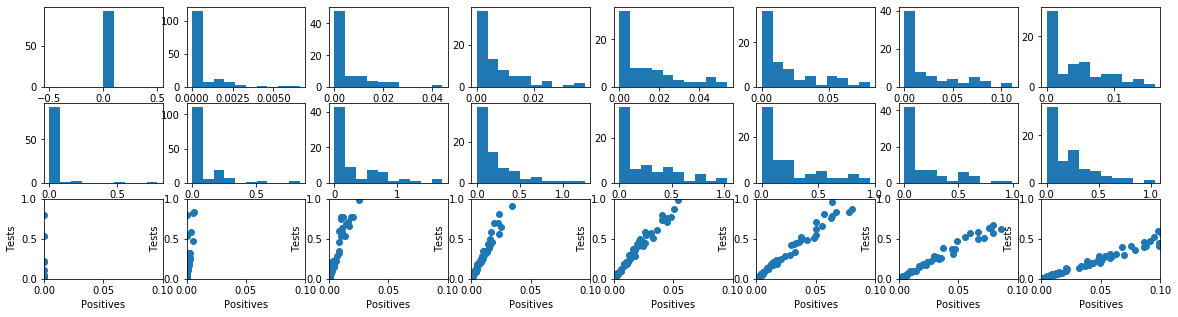

In [544]:

a=values[:,1,:]/values[:,0,:]
b=values[:,1,:]
c=values[:,0,:]
da = days[:,0,:]
ind=~np.isnan(a)
a=a[ind]
b=b[ind]
c=c[ind]
da=da[ind]
print(len(b))
thrs = np.linspace(0,100,10)
fig,ax=plt.subplots(3,len(thrs)-2,figsize=(20,5))

for i in range(0,len(thrs)-2):
    #thr=thrs[i]
    #print(a<np.percentile(a,thrs[i-1]))
    #print([thrs[i],thrs[i+1]])
    
    b1=b[(a>=np.percentile(a,thrs[i]))*(a<=np.percentile(a,thrs[i+1]))]
    c1=c[(a>=np.percentile(a,thrs[i]))*(a<=np.percentile(a,thrs[i+1]))]
   # print('b')
    #print([np.min(b1),np.max(b1),np.mean(b1)])
    #print('c')
    #print([np.min(c1),np.max(c1),np.mean(c1)])
    
    #print(len(b1))
    #print(len(a))
    #b2=b[a>thr]
    #a=a[a<10000000000]
    ax[0,i].hist(b1)
    ax[1,i].hist(c1)
    ax[2,i].scatter(b1,c1)
    ax[2,i].set_xlim([0,0.1])
    ax[2,i].set_ylim([0,1])
    ax[2,i].set_xlabel('Positives')
    ax[2,i].set_ylabel('Tests')
    
    #ax[i].hist(b2)
    #print(np.mean(b1))
    #print(np.mean(b2))

/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


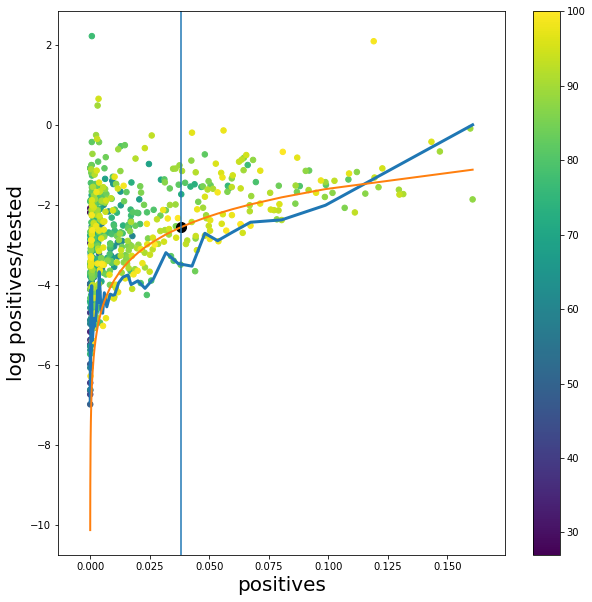

In [549]:
N=50
prctile = 2
axb = np.linspace(np.min(b), np.max(b), N)
fit = np.zeros(N)
for i in range(len(axb)-1):
    #print(i)
    #print(np.percentile(b,100*(i+1)/N))
    #print((b<=np.percentile(b,np.floor(100*(i+1)/N))))
    inds = (b<=np.percentile(b,np.floor(100*(i+1)/N)))*(b>=np.percentile(b,np.floor(100*(i)/N)))
    #print(inds)
    logs=np.log(a[inds])
    #logs = logs[logs>-np.inf]
    #if(len(logs)==0):
     #   logs=-0
    ll = np.percentile(logs,prctile)
    fit[i] = ll
    axb[i] = np.median(b[inds])
fig,ax=plt.subplots(1,figsize=(10,10))
im=ax.scatter(b,np.log(a),30,da)
fig.colorbar(im,ax=ax)
ax.plot(axb,fit,linewidth=3)
ax.set_xlabel('positives',fontsize=20)
ax.set_ylabel('log positives/tested',fontsize=20)


def f(x,axb,fit):
    if(x<=axb[0]):
        y = axb[0]
        return y
    if(x>=axb[-1]):
        y = axb[-1]
        return y
    ind1 = np.where(axb<=x)
    ind2 = np.where(axb>x)
    return fit[ind1[0][-1]]/2+fit[ind2[0][0]]/2

N2 = 10000
xx = np.linspace(np.min(b), np.max(b), N2)
yy = np.array([f(xx[i],axb,fit) for i in range(len(xx))])

indgood = np.where(b>np.percentile(b,75))
inds=50
indsample = indgood[0][inds]
ax.scatter(b[indsample],np.log(a[indsample]),100,color='black')
#ax[0].plot(xx,yy,color='red',linewidth=2)

sample_b = b[indsample] 

factors = np.linspace(0.01,10,100)
bnews = factors*sample_b
anews = bnews/c[indsample]
ff = np.array([f(axb[i],axb,fit) for i in range(len(axb))])

#ax[1].plot(axb,ff,linewidth=2)
#ax[1].plot(axb,fit,linewidth=2)
ax.plot(axb,np.log(a[indsample])+np.log(axb/sample_b),linewidth=2)#ax[1].plot(factors,np.log(factors)+np.log(sample_b/c[indsample]),linewidth=2)
ax.axvline(sample_b)
#ax[1].set_xscale('log')
#plt.plot(axb,fit)
plt.savefig('countries.png')

/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [-inf, 2.2188704468333063] is not finite

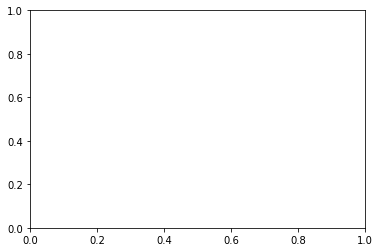

In [532]:
aaa=np.log(a[a<np.inf])
plt.hist(np.log(a[a<np.inf]))
